In [14]:
import numpy as np
import pandas as pd
import scipy.optimize
import bokeh.plotting
import bokeh.io
from bokeh.io import export_png
from bokeh.plotting import curdoc 
from natsort import natsorted
from matplotlib import pyplot as plt
import glob

bokeh.io.output_notebook()

Loading BokehJS ...

In [4]:
def agonist_only_p_active_theory(c_agonist, log_Kd_active, log_Kd_inactive, beta_deltaE):
    "theoretical curve for mglur5 active probability"

    Kd_active = 10**(log_Kd_active)
    Kd_inactive = 10**(log_Kd_inactive)
    a = (1 + c_agonist/Kd_active)

    b = (1 + c_agonist/Kd_inactive)

    return a/(a+b*np.exp(-beta_deltaE))

def resid(param, c, p_active):
    return p_active - agonist_only_p_active_theory(c, *param)



In [5]:
#set up plot
from bokeh.plotting import curdoc 
curdoc().clear()
p = bokeh.plotting.figure(plot_height=600,
                         plot_width=600,
                         x_axis_label='[Ligands]M',
                          y_axis_label='active_probability',
                          x_axis_type='log')

colors=bokeh.palettes.Magma[11]

ligand_smooth=np.logspace(-13,-5,200)

for i,deltaE in enumerate(np.linspace(-1,-4,9)):    
    p.line(ligand_smooth, agonist_only_p_active_theory(ligand_smooth, -10.9, -9.9, deltaE), color=colors[i],legend_label='delta E='+str(deltaE))

p.legend.location = "top_left"

bokeh.io.show(p);

In [7]:
#set up plot
from bokeh.plotting import curdoc 
curdoc().clear()
p = bokeh.plotting.figure(plot_height=600,
                         plot_width=600,
                         x_axis_label='[Ligands]M',
                          y_axis_label='active_probability',
                          x_axis_type='log')

colors=bokeh.palettes.Magma[11]
ligand_smooth=np.logspace(-13,-5,200)

for i,Kd_inactive in enumerate(np.linspace(-10,-8,9)):    
    p.line(ligand_smooth, agonist_only_p_active_theory(ligand_smooth, -10.9, Kd_inactive, -1), color=colors[i],legend_label='log_Kd_inactive='+str(Kd_inactive))

p.legend.location = "top_left"

bokeh.io.show(p);

In [8]:
#set up plot

curdoc().clear()
p = bokeh.plotting.figure(plot_height=600,
                         plot_width=600,
                         x_axis_label='[Ligands]M',
                          y_axis_label='active_probability',
                          x_axis_type='log')



for i,Kd_active in enumerate(np.linspace(-11,-8,9)):    
    p.line(ligand_smooth, agonist_only_p_active_theory(ligand_smooth, Kd_active, -9, -1), color=colors[i],legend_label='log_Kd_active='+str(Kd_active))

p.legend.location = "top_left"

bokeh.io.show(p);

In [12]:
#set up plot

curdoc().clear()
p = bokeh.plotting.figure(plot_height=600,
                         plot_width=900,
                         x_axis_label='[Ligands]M',
                          y_axis_label='active_probability',
                          x_axis_type='log')



for i,Kd_active in enumerate(np.linspace(-11,-8,9)):    
    Kd_inactive = Kd_active+2
    p.line(ligand_smooth, agonist_only_p_active_theory(ligand_smooth, Kd_active, Kd_inactive, -1), color=colors[i],legend_label='log_Kd_active='+str(Kd_active)+', log_Kd_active='+str(Kd_inactive))

p.legend.location = "top_left"

bokeh.io.show(p);

In [9]:
np.linspace(-11,-8,9)

array([-11.   , -10.625, -10.25 ,  -9.875,  -9.5  ,  -9.125,  -8.75 ,
        -8.375,  -8.   ])

In [3]:
fnames = natsorted(glob.glob("./jiawei_trupath_csv/MOR_*_Gi1_normalize_deer+Gi.xlsx"))
fnames

['./jiawei_trupath_csv/MOR_BU72_Gi1_normalize_deer+Gi.xlsx',
 './jiawei_trupath_csv/MOR_DAMGO_Gi1_normalize_deer+Gi.xlsx',
 './jiawei_trupath_csv/MOR_MP_Gi1_normalize_deer+Gi.xlsx',
 './jiawei_trupath_csv/MOR_PZM21_Gi1_normalize_deer+Gi.xlsx',
 './jiawei_trupath_csv/MOR_TRV130_Gi1_normalize_deer+Gi.xlsx',
 './jiawei_trupath_csv/MOR_buprenorphine_Gi1_normalize_deer+Gi.xlsx',
 './jiawei_trupath_csv/MOR_lofentanil_Gi1_normalize_deer+Gi.xlsx',
 './jiawei_trupath_csv/MOR_morphine_Gi1_normalize_deer+Gi.xlsx']

In [7]:
curdoc().clear()
p = bokeh.plotting.figure(plot_height=600,
                         plot_width=600,
                         x_axis_label='[Ligands] M',
                          y_axis_label='active_probability',
                          x_axis_type='log')
colors=bokeh.palettes.d3['Category10'][10]

for i,ligand in enumerate(df.columns[1:]):
    c, p_active = df['conc'].values, df[ligand].values
    p.circle(c, p_active, size=7, color=colors[i],legend_label=ligand)

bokeh.io.show(p);

In [30]:
import matplotlib
matplotlib.rc('font', size=20)

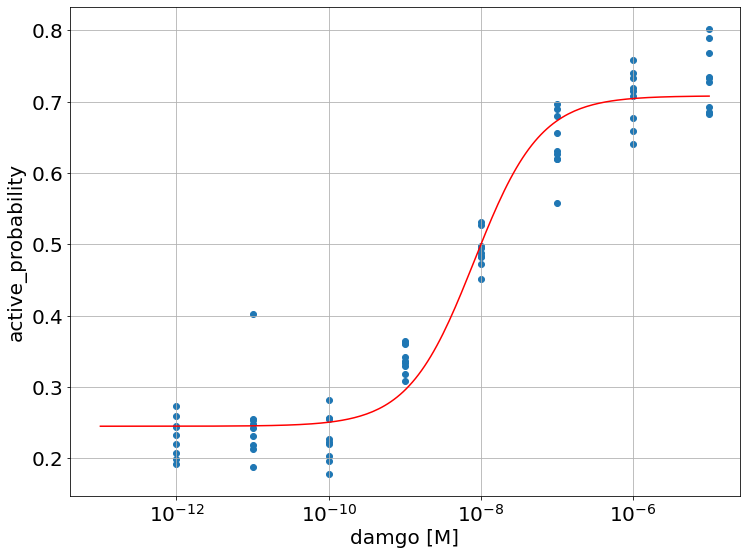

[-8.54798769 -7.67385754 -1.12565056]


In [31]:


df = pd.read_excel('./jiawei_trupath_csv/MOR_DAMGO_Gi1_normalize_deer+Gi.xlsx')

#initial parameter for optimization
p0 = np.array([-7,-4,-4.5])
ligand_name = df.columns[1]
c, p_active = df['conc'].values, df[ligand_name].values

#optimize kd and energy difference to fit the data
res = scipy.optimize.least_squares(resid, p0, args = (c,p_active))

plt.figure(figsize=(12, 9))
plt.scatter(c, p_active)
plt.plot(ligand_smooth, agonist_only_p_active_theory(ligand_smooth, res.x[0],res.x[1],res.x[2]), 'r')

plt.xlabel(ligand_name+' [M]')
plt.ylabel('active_probability')
plt.xscale('log')

  
plt.grid()
plt.show()

"""
p = bokeh.plotting.figure(plot_height=400,
                         plot_width=600,
                         x_axis_label=ligand_name+' [M]',
                          y_axis_label='active_probability',
                          x_axis_type='log')

p.line(ligand_smooth, agonist_only_p_active_theory(ligand_smooth, res.x[0],res.x[1],res.x[2]))
p.circle(c, p_active, size=7)


bokeh.io.show(p);
"""

print(res.x)


In [7]:
df = pd.read_excel('./jiawei_trupath_csv/MOR_DAMGO_arr1_normalize_deer+arr.xlsx')
curdoc().clear()
#initial parameter for optimization
p0 = np.array([-7,-4,-4.5])
ligand_name = df.columns[1]
c, p_active = df['conc'].values, df[ligand_name].values

#optimize kd and energy difference to fit the data
res = scipy.optimize.least_squares(resid, p0, args = (c,p_active))

curdoc().clear()
p = bokeh.plotting.figure(plot_height=400,
                         plot_width=600,
                         x_axis_label=ligand_name+' [M]',
                          y_axis_label='active_probability',
                          x_axis_type='log')

p.line(ligand_smooth, agonist_only_p_active_theory(ligand_smooth, res.x[0],res.x[1],res.x[2]))
p.circle(c, p_active, size=7)


bokeh.io.show(p);
print(res.x)
print(10**res.x)

[-7.47097503 -6.60917465 -2.3884843 ]
[3.38084276e-08 2.45937837e-07 4.08804529e-03]


In [32]:
affinity_energy_table = pd.DataFrame()
for file in fnames:
    df = pd.read_excel(file)
    

./jiawei_trupath_csv/MOR_BU72_Gi1_normalize_deer+Gi.xlsx
./jiawei_trupath_csv/MOR_DAMGO_Gi1_normalize_deer+Gi.xlsx
./jiawei_trupath_csv/MOR_MP_Gi1_normalize_deer+Gi.xlsx
./jiawei_trupath_csv/MOR_PZM21_Gi1_normalize_deer+Gi.xlsx
./jiawei_trupath_csv/MOR_TRV130_Gi1_normalize_deer+Gi.xlsx
./jiawei_trupath_csv/MOR_buprenorphine_Gi1_normalize_deer+Gi.xlsx
./jiawei_trupath_csv/MOR_lofentanil_Gi1_normalize_deer+Gi.xlsx
./jiawei_trupath_csv/MOR_morphine_Gi1_normalize_deer+Gi.xlsx


In [54]:
res.x

array([-9.6270621 , -7.09411868, -3.96001784])

In [14]:
curdoc().clear()
#initial parameter for optimization
p0 = np.array([-9,-4,-4])
c, p_active = df['conc'].values, df['fentanyl'].values/100

#optimize kd and energy difference to fit the data
res = scipy.optimize.least_squares(resid, p0, args = (c,p_active))

curdoc().clear()
p = bokeh.plotting.figure(plot_height=400,
                         plot_width=600,
                         x_axis_label='[fentanyl] M',
                          y_axis_label='active_probability',
                          x_axis_type='log')

p.line(ligand_smooth, agonist_only_p_active_theory(ligand_smooth, res.x[0],res.x[1],res.x[2]))
p.circle(c, p_active, size=7, color=colors[i])

bokeh.io.show(p);
print(10**res.x)
print(res.x)

[1.50763146e-10 1.78055030e-07 7.27951523e-05]
[-9.82170481 -6.74944575 -4.13789754]


In [67]:
res.x

array([-9.82170484, -6.74944575, -4.1378976 ])

In [11]:
def partial_agonist_only_p_active_theory(c_agonist, log_Kd_active, log_Kd_inactive, beta_deltaE):
    "theoretical curve for mglur5 active probability"
    beta_deltaE = -4
    Kd_active = 10**(log_Kd_active)
    Kd_inactive = 10**(log_Kd_inactive)
    a = (1 + c_agonist/Kd_active)

    b = (1 + c_agonist/Kd_inactive)

    return a/(a+b*np.exp(-beta_deltaE))

def partial_resid(param, c, p_active):
    return p_active - partial_agonist_only_p_active_theory(c, *param)

In [12]:
curdoc().clear()
#initial parameter for optimization
p0 = np.array([-9,-7,-4.5])
c, p_active = df['conc'].values, df['lofentanyl'].values

#optimize kd and energy difference to fit the data
res = scipy.optimize.least_squares(partial_resid, p0, args = (c,p_active))

curdoc().clear()
p = bokeh.plotting.figure(plot_height=400,
                         plot_width=600,
                         x_axis_label='[lofentanyl] M',
                          y_axis_label='active_probability',
                          x_axis_type='log')

p.line(ligand_smooth, partial_agonist_only_p_active_theory(ligand_smooth, res.x[0],res.x[1],res.x[2]))
p.circle(c, p_active, size=7, color=colors[i])

bokeh.io.show(p);
print(10**res.x)
print(res.x)

[1.07989867e-13 1.62414430e-11 1.09647820e-04]
[-12.96661699 -10.78937539  -3.96      ]


In [25]:
curdoc().clear()
#initial parameter for optimization
p0 = np.array([-9,-7,-4])
c, p_active = df['conc'].values, df['PZM21'].values/100

#optimize kd and energy difference to fit the data
res = scipy.optimize.least_squares(partial_resid, p0, args = (c,p_active))

curdoc().clear()
p = bokeh.plotting.figure(plot_height=400,
                         plot_width=600,
                         x_axis_label='[PZM21] M',
                          y_axis_label='active_probability',
                          x_axis_type='log')

p.line(ligand_smooth, partial_agonist_only_p_active_theory(ligand_smooth, res.x[0],res.x[1],res.x[2]))
p.circle(c, p_active, size=7, color=colors[i])

bokeh.io.show(p);
print(10**res.x)
print(res.x)

[4.24527530e-10 2.18645805e-08 1.00000000e-04]
[-9.37209414 -7.66025885 -4.        ]
